---
draft: true
---

# Description

Exploratory analysis of the dataset

In [55]:
# import libraries 
import pandas as pd

# import dataset into a dataframe
df = pd.read_csv('Dataset.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20000 non-null  int64  
 1   avg_d_kbps       20000 non-null  int64  
 2   avg_u_kbps       20000 non-null  int64  
 3   avg_lat_ms       20000 non-null  int64  
 4   avg_lat_down_ms  19097 non-null  float64
 5   avg_lat_up_ms    19127 non-null  float64
 6   net_type         20000 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ MB
None


,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type
0,1,9711,1489,21,208.0,NaN,moblie
1,2,50073,18199,40,475.0,1954.0,moblie
2,3,21784,745,47,1493.0,2252.0,moblie
3,4,18159,1662,21,244.0,2067.0,moblie
4,5,1439,659,749,2357.0,5083.0,moblie


There are many rows of data so we can drop every row that contains NaN entries and still have enough to train our prediction models and test our hypotheses. 

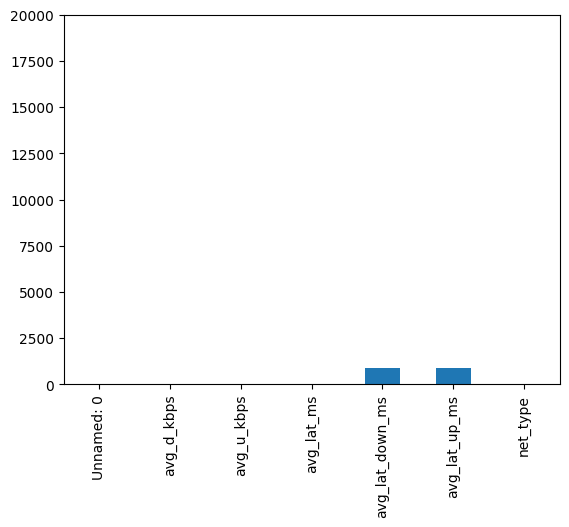

In [56]:
#| label: fig-missing
#| fig-cap: "Bar plot of missing values in each column"
#| code-fold: true
# Create a deep copy of the dataframe for cleaning
cleaning_df = df.copy()

# Not many rows with missing values as shown in plot
cleaning_df.isna().sum().plot(kind='bar', ylim=(0, cleaning_df.shape[0]))

# Drop rows with missing values
cleaning_df.dropna(inplace = True)

Column 'Unamed: 0' is not needed therefore we will drop it from the dataset. Correct the spelling of the 'moblie' to 'Mobile' and capitalize 'fixed' in 'net_type column and convert that column to a category dtype.

In [57]:
# drop unnecessary index column
cleaning_df.drop(columns='Unnamed: 0', inplace=True)

# Correct spelling mistake and capitalize
cleaning_df.replace('moblie', 'Mobile', inplace=True)
cleaning_df.replace('fixed', 'Fixed', inplace=True)

# change column to category type
cleaning_df['net_type'] = cleaning_df['net_type'].astype('category')
cleaning_df['net_type'].unique()

['Mobile', 'Fixed']
Categories (2, object): ['Fixed', 'Mobile']

Drop any duplicate entries in the dataframe

In [58]:
# Drop any duplicate entries in the dataframe
cleaning_df.drop_duplicates(inplace=True)

Check the two columns set as a float64 dtype to see if they can be changed to int64. If they only have integers in them then convert to int64.

In [59]:
#set bool to True intially, bool will change to False if any floats are discovered
is_int = True
# iterate through each row in column
for row in cleaning_df['avg_lat_down_ms']:
    #if value isn't an integer set bool is_int to false and exit loop
    if not row.is_integer():
        is_int = False
        break
    
# if after checking there are no floats found in column convert column to int64
if is_int:
    cleaning_df['avg_lat_down_ms'] = cleaning_df['avg_lat_down_ms'].astype('int64')

#set bool to True intially, bool will change to False if any floats are discovered
is_int = True
# iterate through each row in column
for row in cleaning_df['avg_lat_up_ms']:
    #if value isn't an integer set bool is_int to false and exit loop
    if not row.is_integer():
        is_int = False
        break

# if after checking there are no floats found in column convert column to int64
if is_int:
    cleaning_df['avg_lat_up_ms'] = cleaning_df['avg_lat_up_ms'].astype('int64')

cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19030 entries, 1 to 19999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   avg_d_kbps       19030 non-null  int64   
 1   avg_u_kbps       19030 non-null  int64   
 2   avg_lat_ms       19030 non-null  int64   
 3   avg_lat_down_ms  19030 non-null  int64   
 4   avg_lat_up_ms    19030 non-null  int64   
 5   net_type         19030 non-null  category
dtypes: category(1), int64(5)
memory usage: 910.7 KB


In [60]:
cleaning_df

,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type
1,50073,18199,40,475,1954,Mobile
2,21784,745,47,1493,2252,Mobile
3,18159,1662,21,244,2067,Mobile
4,1439,659,749,2357,5083,Mobile
5,13498,3525,37,598,1023,Mobile
...,...,...,...,...,...,...
19995,215644,114035,14,384,606,Fixed
19996,48533,17553,34,172,43,Fixed
19997,5732,473,52,8039,304,Fixed
19998,116025,129465,8,91,219,Fixed


All of the columns are using the same units of measurement and set to the correct data type. Spelling errors have been corrected and all rows containing missing values have been dropped from the dataset. The unnamed index column has also been dropped as it is not needed. Now we save the cleaned dataset for use in Analysis.ipynb.

In [62]:
# rename columns to the unit they will be converted into
cleaning_df.rename(columns={'avg_d_kbps' : 'avg_d_mbps', 'avg_u_kbps' : 'avg_u_mbps'}, inplace=True)

# convert kbps to mbps for more readability
cleaning_df['avg_d_mbps'] = cleaning_df['avg_d_mbps']/1000
cleaning_df['avg_u_mbps'] = cleaning_df['avg_u_mbps']/1000

cleaning_df

,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type
1,50.073,18.199,40,475,1954,Mobile
2,21.784,0.745,47,1493,2252,Mobile
3,18.159,1.662,21,244,2067,Mobile
4,1.439,0.659,749,2357,5083,Mobile
5,13.498,3.525,37,598,1023,Mobile
...,...,...,...,...,...,...
19995,215.644,114.035,14,384,606,Fixed
19996,48.533,17.553,34,172,43,Fixed
19997,5.732,0.473,52,8039,304,Fixed
19998,116.025,129.465,8,91,219,Fixed


In [63]:
#save cleaned dataset to a parquet file to preserve the dtype info in the dataframe
cleaning_df.to_parquet('cleaned_dataset.parquet', index=False)